In [1]:
from galpy.potential import MWPotential2014, evaluateDensities, evaluateRforces, evaluateR2derivs
from galpy.orbit import Orbit
from galpy.util import bovy_conversion
import numpy as np
from scipy.constants import G, parsec, giga, year
G *= (bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0)*1000.0*parsec)**(-3.0) * (bovy_conversion.mass_in_msol(220.0, 8.0)*(2.0*10.0**30.0)) * (bovy_conversion.time_in_Gyr(220.0,8.0)*giga*year)**(2.0)

/home/ppxest/anaconda3/lib/python3.7/site-packages/astropy/extern/six.py:15: AstropyDeprecationWarning: astropy.extern.six will be removed in 4.0, use the six module directly if it is still needed
  AstropyDeprecationWarning)



In [2]:
#Function to calculate Jacobi radius
def jacobiRadius(R, z, phi, t, M_b):
    dPhidR = -evaluateRforces(MWPotential2014, R, z, phi, t)
    d2PhidR2 = evaluateR2derivs(MWPotential2014, R, z, phi, t)
    return (G*M_b/R *(dPhidR/(R**2.0) - d2PhidR2/R)**(-1.0))**(1.0/3.0)

In [3]:
#o = Orbit(vxvv=[1.,0.1,1.1,0.,0.1,0.])
#o = Orbit.from_name('NLTT 37790')
o = Orbit()
o.turn_physical_off()
#o.flip(inplace = True)

In [4]:
#End time in Gyr
T = 10.0 / bovy_conversion.time_in_Gyr(220.0, 8.0)
#Time step size
dt = 0.01 / bovy_conversion.time_in_Gyr(220.0, 8.0)
ts = np.arange(0, T+dt, dt, dtype=float)
N_t = np.size(ts)

In [5]:
#Integrate orbit
o.integrate(ts, MWPotential2014)

In [6]:
#Find time corresponding to minimum R
R_min = o.R(ts[0])
t_min = ts[0]
for t in ts:
    if (o.R(t) < R_min):
        R_min = o.R(t)
        t_min = t
#Calculate Jacobi radius
r_J = jacobiRadius(o.R(t_min), o.z(t_min), o.phi(t_min), t_min, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0))
#r_J = jacobiRadius(o.R(), o.z(), o.phi(), 0, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0))
print('Jacobi radius, pc =', r_J*1000.0*bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0))

Jacobi radius, pc = 1.7200705306361095


In [7]:
#Evaluate average dark matter density and stellar density
avg_dm_density = 0.0
avg_stellar_density = 0.0
for i in range(N_t):
    avg_dm_density += evaluateDensities(MWPotential2014[2], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T
    avg_stellar_density += evaluateDensities(MWPotential2014[0], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T + evaluateDensities(MWPotential2014[1], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T
print('Average dark matter density =', avg_dm_density*bovy_conversion.dens_in_msolpc3(220.0, 8.0))
print('Average stellar density =', avg_stellar_density*bovy_conversion.dens_in_msolpc3(220.0, 8.0))

Average dark matter density = 0.006779741377375498
Average stellar density = 0.07180492831077685


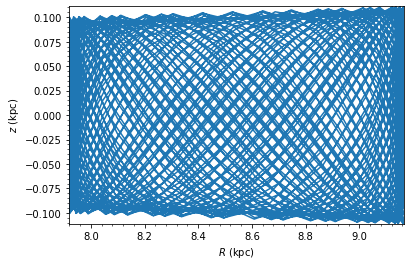

In [8]:
o.plot(vo=220.0, ro=8.0)